In [1]:
# 이 셀은 VSCode 환경에서만 실행할 것!
%cd ..

c:\Users\jeong\Desktop\state-farm-distracted-driver-detection


In [2]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

from src.utils.distracted_driver_label import label_dict

# 한글 깨짐 문제
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5, .5, .5], std=[.5, .5, .5]),
])
batch_size = 4
shuffle = True

dataset = ImageFolder("data/imgs/train", transform)
dataloader = DataLoader(dataset, batch_size, shuffle)

unnormalize = transforms.Normalize(
    mean=[-1, -1, -1],
    std=[2, 2, 2]
)

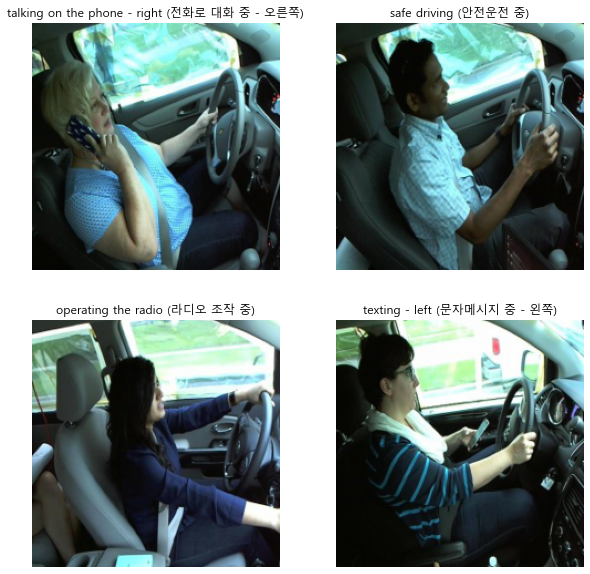

In [4]:
plt.figure(figsize=(10, 10))

batch = next(iter(dataloader))
inputs, targets = batch
for i in range(batch_size):
    img = unnormalize(inputs[i])
    img = img.permute(1,2,0).numpy()

    plt.subplot(2,2,i+1)
    plt.axis('off')
    plt.title(label_dict[targets[i].item()])
    plt.imshow(img)
plt.show()